In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np


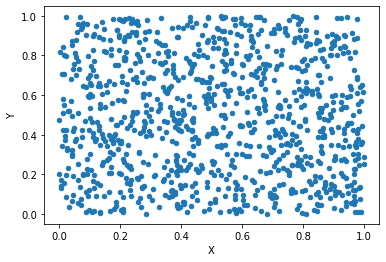

In [2]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.X = X
df_xy.Y = Y
df_xy.plot(x="X",y = "Y",kind="scatter")

In [3]:

X = np.random.uniform(0,1,1000)
X

array([0.97163009, 0.98109787, 0.42504602, 0.62955217, 0.21617018,
       0.13981477, 0.37135737, 0.82499095, 0.63522791, 0.88074448,
       0.31363951, 0.80963634, 0.71873517, 0.87250047, 0.10745126,
       0.03604621, 0.65600979, 0.31124455, 0.52821346, 0.68256049,
       0.39301706, 0.61543687, 0.27548269, 0.20106375, 0.27727079,
       0.88998964, 0.68451215, 0.44277372, 0.74206711, 0.4959919 ,
       0.31756113, 0.92112487, 0.06725876, 0.69555595, 0.39071302,
       0.14968046, 0.00185196, 0.07108507, 0.15889566, 0.94765858,
       0.59769637, 0.59782821, 0.12378528, 0.69689075, 0.2055969 ,
       0.16016108, 0.6155971 , 0.06565795, 0.49655397, 0.52356303,
       0.52977501, 0.43896947, 0.97848642, 0.98336163, 0.39238071,
       0.08632829, 0.55951331, 0.2993874 , 0.43754228, 0.45791018,
       0.78487881, 0.76682596, 0.33711628, 0.96176114, 0.54533573,
       0.02597507, 0.13941268, 0.85507593, 0.06545783, 0.97218055,
       0.84141415, 0.91518505, 0.12552642, 0.90394808, 0.06717

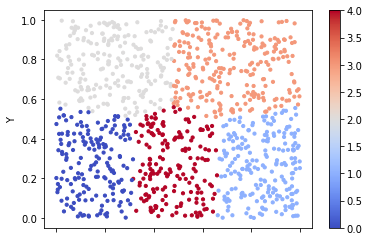

In [4]:
model1 = KMeans(n_clusters=5).fit(df_xy)

df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)


In [5]:
Univ = pd.read_csv("../input/uni478/Universities (1).csv")

In [6]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Univ.iloc[:,1:])


df_norm.head(10)  # Top 10 rows


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


In [7]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)

model.labels_ # getting the labels of clusters assigned to each row 

array([0, 2, 3, 0, 0, 4, 4, 0, 4, 2, 4, 0, 0, 1, 4, 1, 4, 1, 3, 0, 3, 0,
       0, 1, 4], dtype=int32)

In [8]:
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
Univ['clust']=md # creating a  new column and assigning it to new column 
df_norm.head()


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


In [9]:
Univ.iloc[:,1:7].groupby(Univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1274.444444,80.000000,34.888889,12.444444,24295.555556,90.666667
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
3,1226.666667,74.000000,55.666667,14.000000,18545.333333,78.333333
4,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429


In [10]:
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,3
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
